In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [468]:
df = pd.read_csv("dataset_model.csv")#reading csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [469]:
#removing primary key..
df_unique = df.drop(columns='Loan_ID',inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [470]:
#identifying continious columns
num_cols = df._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df[i].unique())) > int(df.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [471]:
#Identifying categorial columns. 
cat_cols = list(set(df.columns) - set(cont_cols))
cat_cols

['Dependents',
 'Credit_History',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area',
 'Loan_Status',
 'Married',
 'Gender']

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


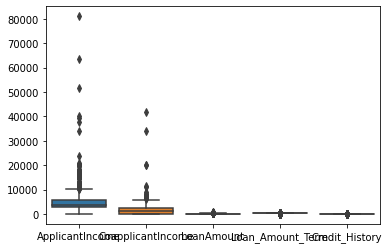

In [472]:
print(df['ApplicantIncome'].describe())
sns.boxplot(data=df)

In [0]:
#creating a function for outliers detection and treatment with interquartile range meatho.
def inter_out(data,k=1.5):
  sorted(data)
  q1,q3 = np.percentile(data,[25,75])
  Iqr = q3-q1
  Lower_bound = q1 - (k*Iqr)
  Upper_bound = q3 + (k*Iqr)
  return Lower_bound, Upper_bound

In [475]:
for i in  cont_cols:
  Lower_bound, Upper_bound=inter_out(df[i])
  for j in df[i]:
    if j > Upper_bound:
      df[i].replace(j,Upper_bound,inplace=True)
    elif  j < Lower_bound:
      df[i].replace(j,Lower_bound,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


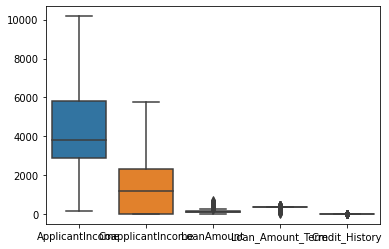

In [477]:
sns.boxplot(data=df)#outliers successfully handled

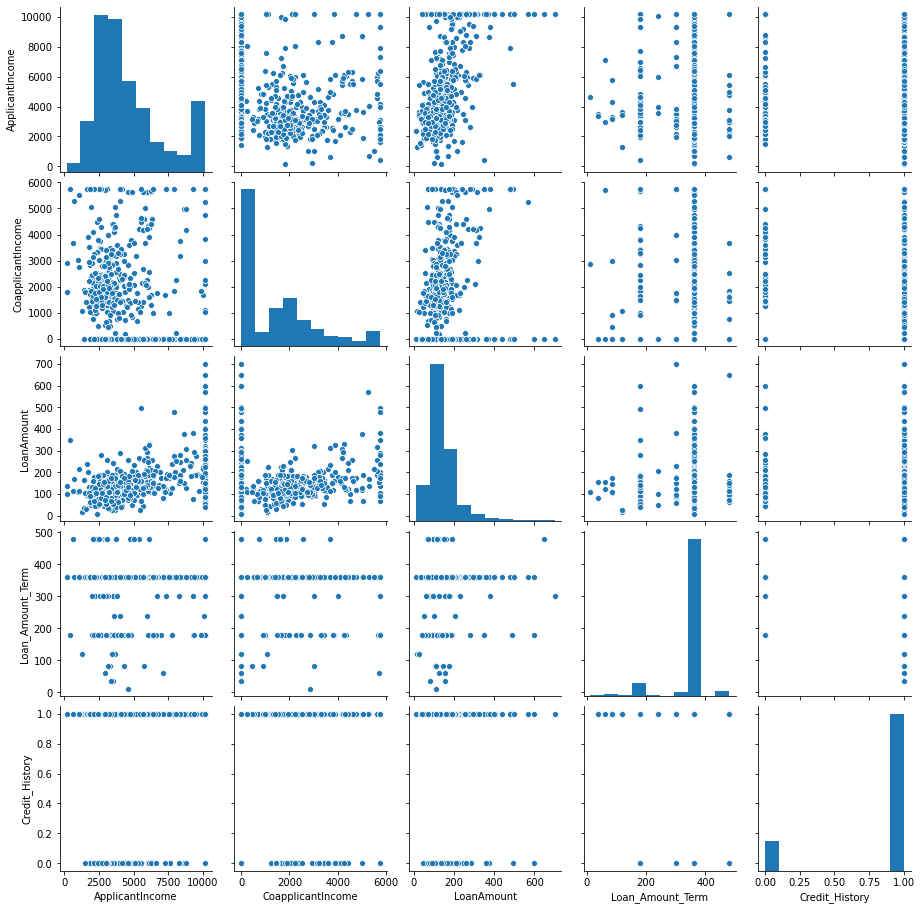

In [479]:
sns.pairplot(data=df)#vizulating the data to see any commplications before moving further

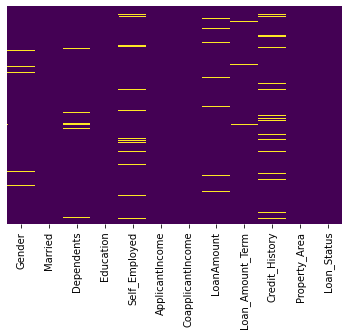

In [480]:
#visualising missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
#treating the null values
for i in cat_cols:
  df[i].fillna(df[i].mode()[0],inplace=True)
for i in cont_cols:
  df[i].fillna(df[i].mean(),inplace=True)

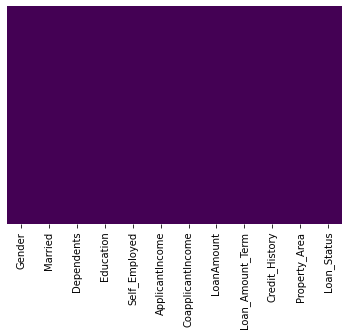

In [482]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#All null values have been treated

#Label encoding

In [0]:
df_fe = df.copy()
df_fe.drop('Loan_Status',axis=1,inplace=True)
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()
cat_cols = list(set(cat_cols) - set(['Loan_Status']))

In [486]:
for j in cat_cols :
  df_fe['enc_'+str(j)] = le.fit_transform(df_fe[j])
df_le = df_fe.drop(columns = cat_cols)
df_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Dependents,enc_Credit_History,enc_Education,enc_Self_Employed,enc_Loan_Amount_Term,enc_Property_Area,enc_Married,enc_Gender
0,5849.0,0.0,146.412162,0,1,0,0,8,2,0,1
1,4583.0,1508.0,128.000000,1,1,0,0,8,0,1,1
2,3000.0,0.0,66.000000,0,1,0,1,8,2,1,1
3,2583.0,2358.0,120.000000,0,1,1,0,8,2,1,1
4,6000.0,0.0,141.000000,0,1,0,0,8,2,0,1


In [487]:
print(df_target['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [0]:
#Spliiting the data into tain and test set.
X_train, X_test, Y_train, Y_test = train_test_split(df_le, df_target, test_size=0.25, random_state=40 , stratify=df_target)

In [495]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [496]:
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


#Logistic regression

In [498]:
clf_LR = LogisticRegression( random_state=40)
clf_LR.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [499]:
y_pred = clf_LR.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [500]:
print("####Parameter tuning without GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Logisticregression Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Logisticregressione Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Logisticregression Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Logisticregression Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning without GridSearch###
Confusion Matrix
[[ 20  28]
 [  2 104]]
Accuracy of Logisticregression Model:
0.8051948051948052
Precision of Logisticregressione Model:
0.7878787878787878
Recall of Logisticregression Model:
0.9811320754716981
F1 Score of Logisticregression Model:
0.8739495798319327


In [501]:
#applying grid search
clf_LR = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
CV_Lr = GridSearchCV(estimator=clf_LR, param_grid=param_grid, cv= 3)
CV_Lr.fit(X_train, Y_train)
clf_best_dt = CV_Lr.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [502]:
print("####Parameter tuning after GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning after GridSearch###
Confusion Matrix
[[ 20  28]
 [  1 105]]
Accuracy of Randomforest Model:
0.8116883116883117
Precision of Randomforest Model:
0.7894736842105263
Recall of Randomforest Model:
0.9905660377358491
F1 Score of Randomforest Model:
0.8786610878661087


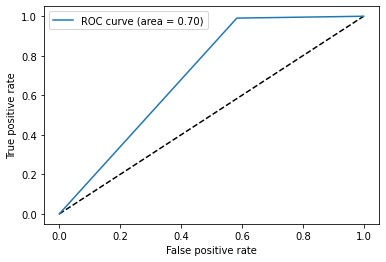

In [503]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

#Using RandomForest Classifier 


In [504]:
clf_RFC = RandomForestClassifier(random_state=40)
clf_RFC.fit(X_train,Y_train)
y_pred = clf_RFC.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [505]:
print("####Parameter tuning without GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning without GridSearch###
Confusion Matrix
[[23 25]
 [ 7 99]]
Accuracy of Randomforest Model:
0.7922077922077922
Precision of Randomforest Model:
0.7983870967741935
Recall of Randomforest Model:
0.9339622641509434
F1 Score of Randomforest Model:
0.8608695652173912


In [506]:
clf_RFC = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf_RFC, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [507]:
print("####Parameter tuning after GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning after GridSearch###
Confusion Matrix
[[ 20  28]
 [  1 105]]
Accuracy of Randomforest Model:
0.8116883116883117
Precision of Randomforest Model:
0.7894736842105263
Recall of Randomforest Model:
0.9905660377358491
F1 Score of Randomforest Model:
0.8786610878661087


In [508]:
roc_auc_score(Y_test,y_pred)

0.7036163522012577

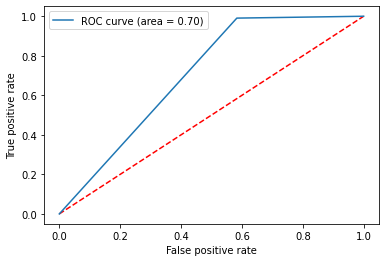

In [509]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

#One hot encoding

In [0]:
df_ohe = df.copy()
df_ohe.drop('Loan_Status',axis=1,inplace=True)

In [511]:
for j in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Gender_Female,Gender_Male
0,5849.0,0.0,146.412162,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
1,4583.0,1508.0,128.000000,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
2,3000.0,0.0,66.000000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
3,2583.0,2358.0,120.000000,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,6000.0,0.0,141.000000,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=40 , stratify=df_target)

#Logistic regression

In [514]:
clf_LR_ohe = LogisticRegression(random_state=40)
clf_LR_ohe.fit(X_train,Y_train)
y_pred = clf_LR_ohe.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [515]:
print("####Parameter tuning without GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Logisticregression Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Logisticregressione Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Logisticregression Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Logisticregression Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning without GridSearch###
Confusion Matrix
[[ 21  27]
 [  2 104]]
Accuracy of Logisticregression Model:
0.8116883116883117
Precision of Logisticregressione Model:
0.7938931297709924
Recall of Logisticregression Model:
0.9811320754716981
F1 Score of Logisticregression Model:
0.8776371308016877


In [516]:
#applying grid search
clf_LR_ohe = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
CV_Lr = GridSearchCV(estimator=clf_LR_ohe, param_grid=param_grid, cv= 3)
CV_Lr.fit(X_train, Y_train)
clf_best_dt = CV_Lr.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [517]:
print("####Parameter tuning after GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Logisticregression Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Logisticregressione Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Logisticregression Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Logisticregression Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning after GridSearch###
Confusion Matrix
[[ 20  28]
 [  1 105]]
Accuracy of Logisticregression Model:
0.8116883116883117
Precision of Logisticregressione Model:
0.7894736842105263
Recall of Logisticregression Model:
0.9905660377358491
F1 Score of Logisticregression Model:
0.8786610878661087


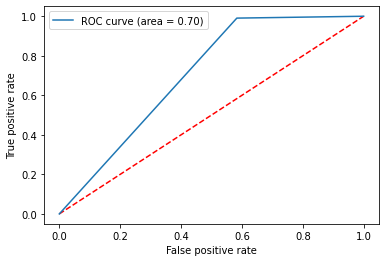

In [518]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

#Random forest classifier


In [519]:
clf_RFC_ohe = RandomForestClassifier(random_state=40)
clf_RFC_ohe.fit(X_train,Y_train)
y_pred = clf_RFC_ohe.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [520]:
print("####Parameter tuning without GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning without GridSearch###
Confusion Matrix
[[23 25]
 [ 9 97]]
Accuracy of Randomforest Model:
0.7792207792207793
Precision of Randomforest Model:
0.7950819672131147
Recall of Randomforest Model:
0.9150943396226415
F1 Score of Randomforest Model:
0.8508771929824561


In [521]:
clf_RFC_ohe = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=clf_RFC_ohe, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)
clf_best_rfc = CV_rfc.best_estimator_
print(clf_best_rfc)
y_pred = clf_best_rfc.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [522]:
print("####Parameter tuning after GridSearch###")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Randomforest Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Randomforest Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Randomforest Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Randomforest Model:")
print (f1_score(Y_test, y_pred))

####Parameter tuning after GridSearch###
Confusion Matrix
[[ 20  28]
 [  1 105]]
Accuracy of Randomforest Model:
0.8116883116883117
Precision of Randomforest Model:
0.7894736842105263
Recall of Randomforest Model:
0.9905660377358491
F1 Score of Randomforest Model:
0.8786610878661087


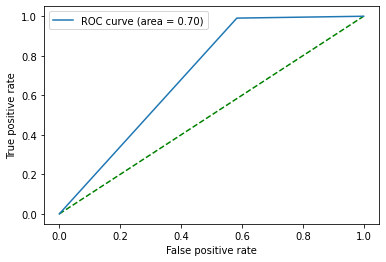

In [523]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

#Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?
- for logistic regression model there was not as such a big difference between feeding the model with label encoded data or ohe encoded data.
- for Random Forest Regression model, the model perforemed well when feed OHE encoded data.